In [1]:
import os, sys

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.ascii as at

In [3]:
from analyze_cluster_output import mass_to_bp_rp
from plot_periods import plot_periodcolor_histogram

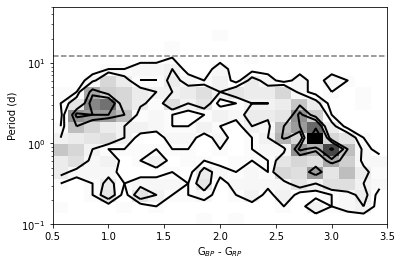

In [4]:
ax = plot_periodcolor_histogram(clean_limit=0,to_plot_indiv=False)

In [5]:
mod_dir = os.path.expanduser("~/Dropbox/Models")

/Users/douglste/Dropbox/Models/UpSco_ZeroTorque/UpSco_ZeroTorque_00010Myr.txt
   mass      period  
---------- ----------
   0.30328  1.7225058
    1.2012  3.3410384
0.28535998  2.9176929
  0.582192 0.32276194
 1.2705761  3.1028878
/Users/douglste/Dropbox/Models/UpSco_Mattea2015/UpSco_Mattea2015_00010Myr.txt
   mass      period  
---------- ----------
   0.30328  1.7442148
    1.2012  3.3924153
0.28535998  2.9543475
  0.582192 0.32683924
 1.2705761   3.155835
/Users/douglste/Dropbox/Models/UpSco_Mattea2022/UpSco_Mattea2022_00010Myr.txt
   mass      period  
---------- ----------
   0.30328  1.7579023
    1.2012  3.4630384
0.28535998  2.9905422
  0.582192 0.32532604
 1.2705761  3.2278482
/Users/douglste/Dropbox/Models/UpSco_ZeroTorque/UpSco_ZeroTorque_00020Myr.txt
   mass      period  
---------- ----------
   0.30328  1.0995763
    1.2012  1.3459087
0.28535998  1.8589058
  0.582192 0.21244013
 1.2705761  1.1029768
/Users/douglste/Dropbox/Models/UpSco_Mattea2015/UpSco_Mattea2015_00020My

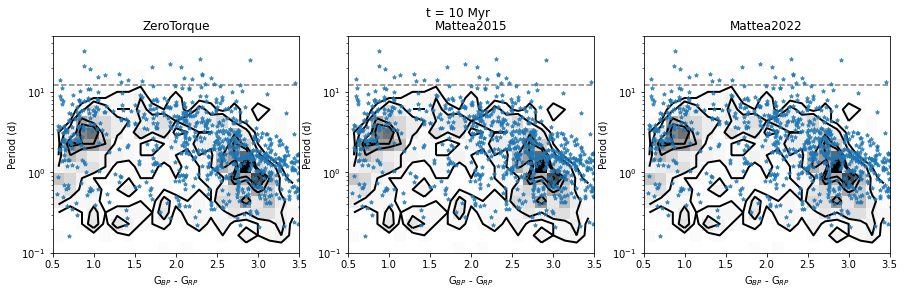

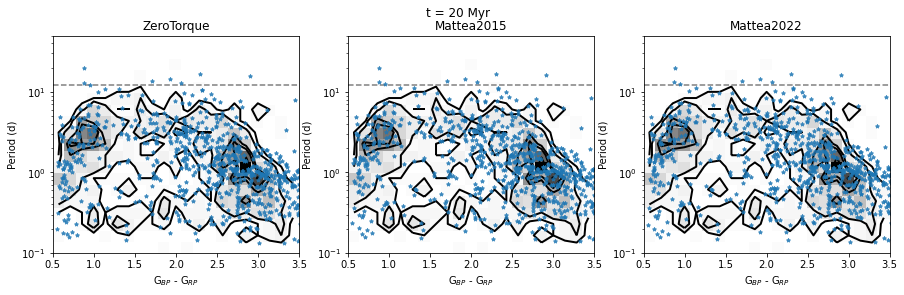

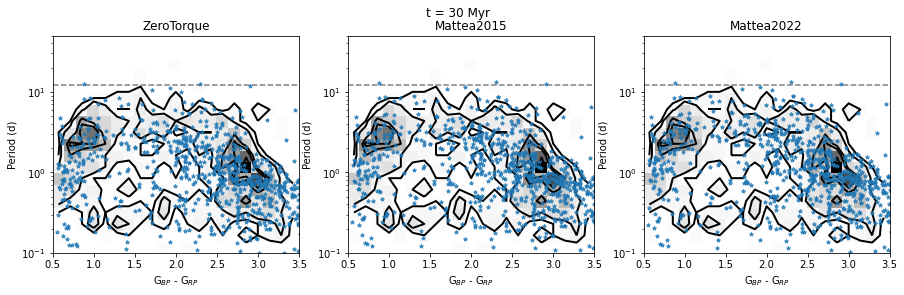

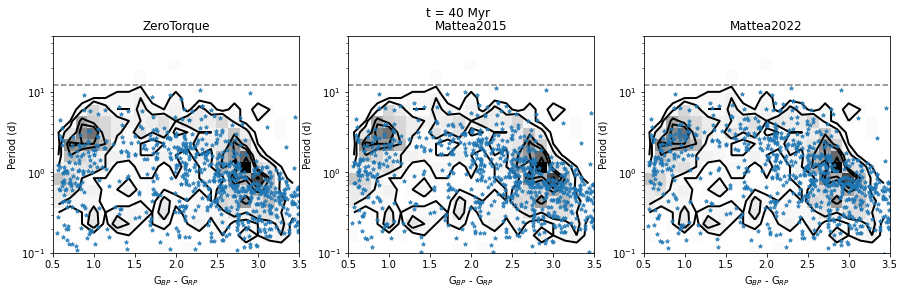

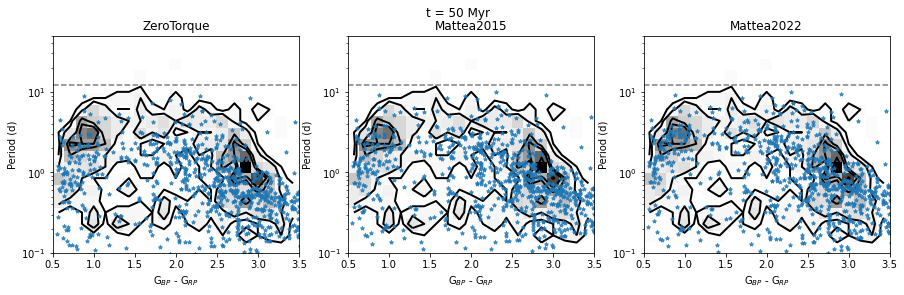

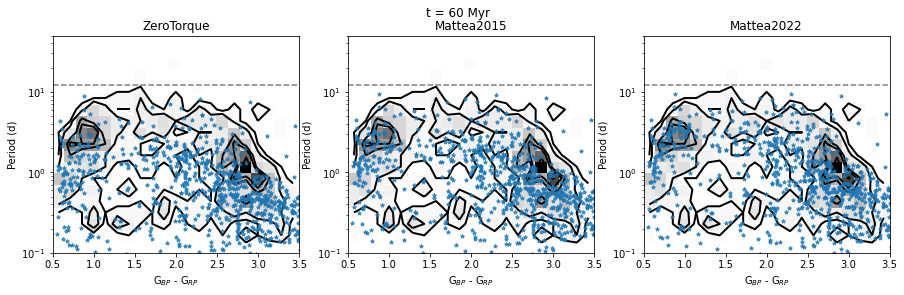

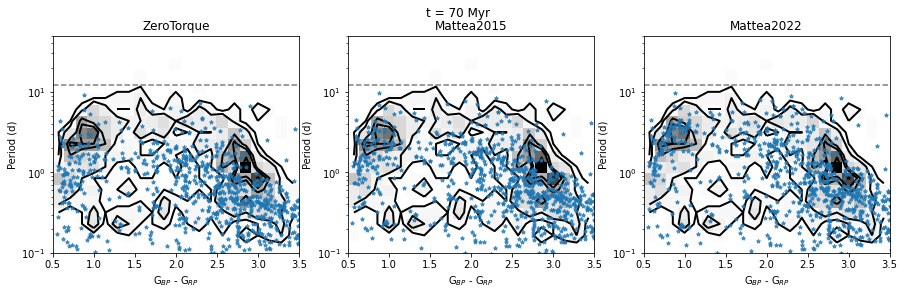

In [6]:
for age in [10,20,30,40,50,60,70]:
    plt.figure(figsize=(15,4))
    for i, model in enumerate(["ZeroTorque","Mattea2015","Mattea2022"]):
        ax = plt.subplot(1,3,i+1)
        modfile = os.path.join(mod_dir,f"UpSco_{model}/UpSco_{model}_000{age}Myr.txt")
        print(modfile)
        mod = at.read(modfile,names=["mass","period"])
        print(mod[:5])
        _ = plot_periodcolor_histogram(clean_limit=0,to_plot_indiv=False,ax=ax)
        mod_bprp = mass_to_bp_rp(mod["mass"])
        ax.plot(mod_bprp,mod["period"],'*',ms=4,alpha=0.75)
        ax.set_title(model)
    plt.suptitle(f"t = {age} Myr")
    plt.savefig(f"plots/matt_models_{age:03d}Myr.png")


/Users/douglste/Dropbox/Models/UpSco_ZeroTorque/UpSco_ZeroTorque_00303Myr.txt
   mass       period  
---------- -----------
   0.30328  0.29544611
    1.2012  0.98222623
0.28535998  0.49068297
  0.582192 0.077152677
 1.2705761  0.93536524
/Users/douglste/Dropbox/Models/UpSco_Mattea2015/UpSco_Mattea2015_00303Myr.txt
   mass      period  
---------- ----------
   0.30328 0.55775488
    1.2012  2.9054658
0.28535998 0.91819524
  0.582192 0.22082946
 1.2705761  1.6703788
/Users/douglste/Dropbox/Models/UpSco_Mattea2022/UpSco_Mattea2022_00303Myr.txt
   mass      period  
---------- ----------
   0.30328 0.71437865
    1.2012  2.8241215
0.28535998  1.4385983
  0.582192 0.12628101
 1.2705761  1.6236685
/Users/douglste/Dropbox/Models/UpSco_ZeroTorque/UpSco_ZeroTorque_00525Myr.txt
   mass       period  
---------- -----------
   0.30328  0.29515842
    1.2012  0.98805637
0.28535998  0.48949509
  0.582192 0.078183075
 1.2705761  0.94576884
/Users/douglste/Dropbox/Models/UpSco_Mattea2015/UpSco_Matt

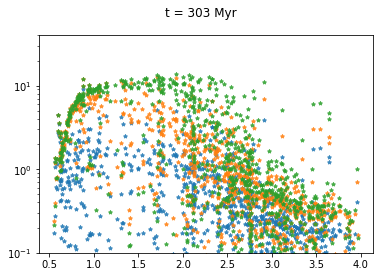

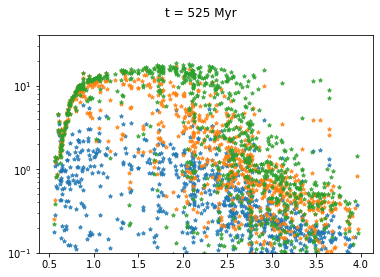

In [7]:
for age in [303,525]:
    plt.figure()
    ax = plt.subplot(111)
#     plt.figure(figsize=(15,4))
    for i, model in enumerate(["ZeroTorque","Mattea2015","Mattea2022"]):
        modfile = os.path.join(mod_dir,f"UpSco_{model}/UpSco_{model}_{age:05d}Myr.txt")
        print(modfile)
        mod = at.read(modfile,names=["mass","period"])
        print(mod[:5])
#         _ = plot_periodcolor_histogram(clean_limit=0,to_plot_indiv=False,ax=ax)
        mod_bprp = mass_to_bp_rp(mod["mass"])
        ax.plot(mod_bprp,mod["period"],'*',ms=4,alpha=0.75,label=model)
#         ax.set_title(model)
    ax.set_ylim(0.1,40)
    ax.set_yscale("log")
    plt.suptitle(f"t = {age} Myr")


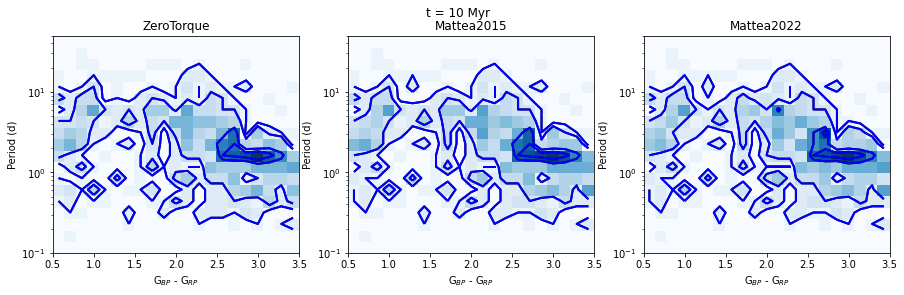

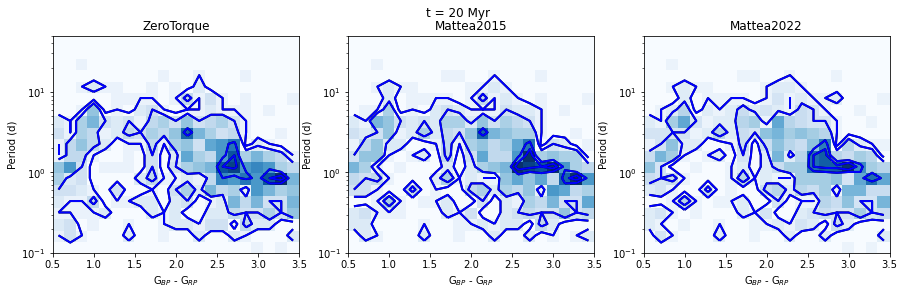

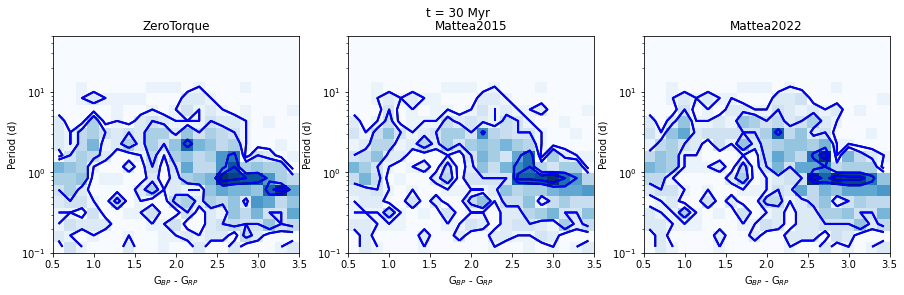

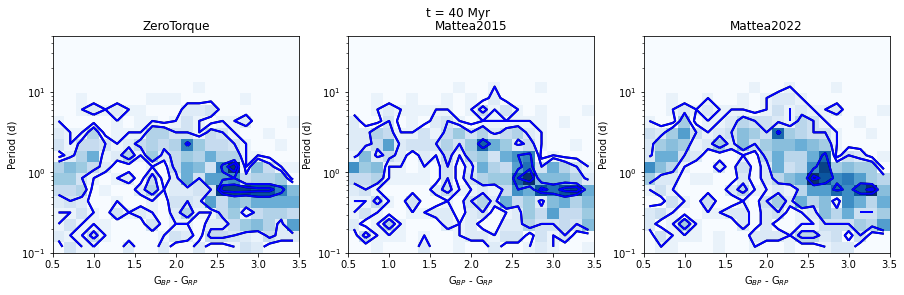

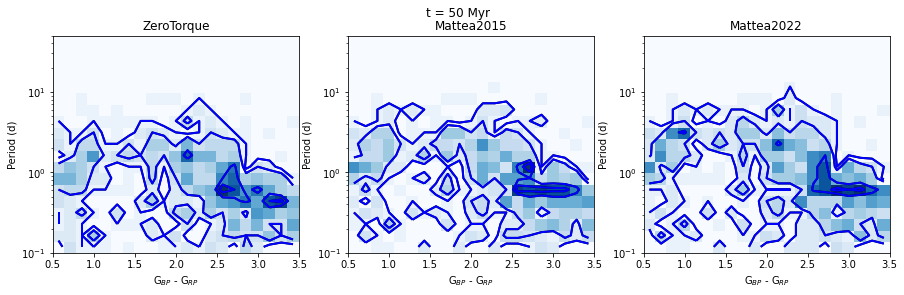

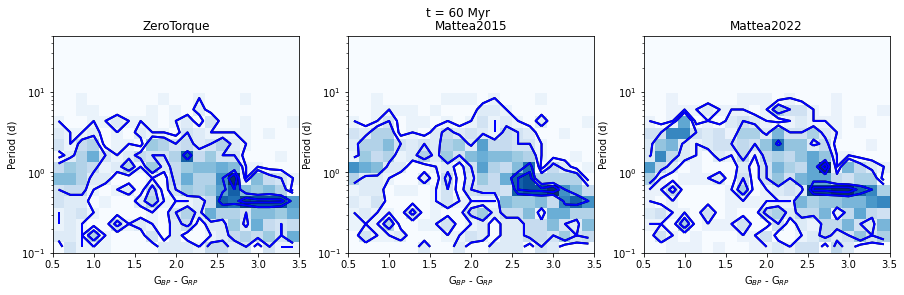

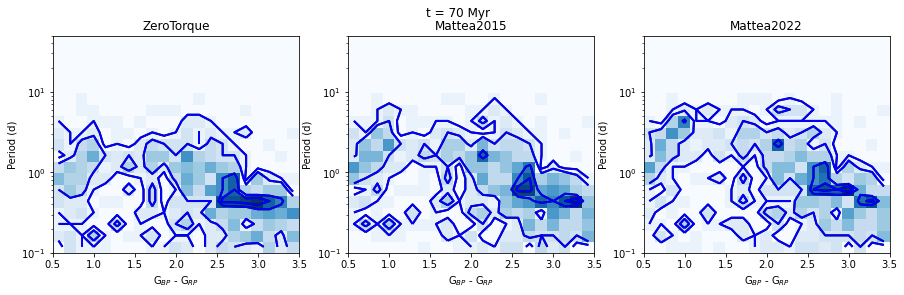

In [13]:
for age in [10,20,30,40,50,60,70]:
    plt.figure(figsize=(15,4))
    for i, model in enumerate(["ZeroTorque","Mattea2015","Mattea2022"]):
        ax = plt.subplot(1,3,i+1)
        modfile = os.path.join(mod_dir,f"UpSco_{model}/UpSco_{model}_000{age}Myr.txt")
#         print(modfile)
        mod = at.read(modfile,names=["mass","period"])
#         print(mod[:5])

#         _ = plot_periodcolor_histogram(clean_limit=0,to_plot_indiv=False,ax=ax)
        mod_bprp = mass_to_bp_rp(mod["mass"])
#         ax.plot(mod_bprp,mod["period"],'*',ms=4,alpha=0.75)
        counts, xedges, yedges, image = ax.hist2d(mod_bprp,mod["period"],bins=[np.linspace(0.5,3.5,22),
                                          np.logspace(-1,np.log10(50),20)],cmap="Blues")
        xx = xedges[:-1] + (xedges[1:] - xedges[:-1])/2
        yy = yedges[:-1] + (yedges[1:] - yedges[:-1])/2
        cs = ax.contour(xx,yy,counts.transpose(),linewidths=2,levels=[1,3,10,13,20],
                        colors="k",antialiased=True)
        
        counts, xedges, yedges = np.histogram2d(mod_bprp,mod["period"],bins=[np.linspace(0.5,3.5,22),
                                          np.logspace(-1,np.log10(50),20)])
        xx = xedges[:-1] + (xedges[1:] - xedges[:-1])/2
        yy = yedges[:-1] + (yedges[1:] - yedges[:-1])/2
        cs = ax.contour(xx,yy,counts.transpose(),linewidths=2,levels=[1,3,10,13,20],
                        colors="b",antialiased=True)

        ax.set_title(model)
        ax.set_ylim(0.1,50)
        ax.set_xlim(0.5,3.5)
        ax.set_yscale("log")

        ax.set_xlabel(r"G$_{BP}$ - G$_{RP}$")
        ax.set_ylabel("Period (d)")

        
        plt.suptitle(f"t = {age} Myr")
#     plt.savefig(f"plots/matt_models_{age:03d}Myr.png")


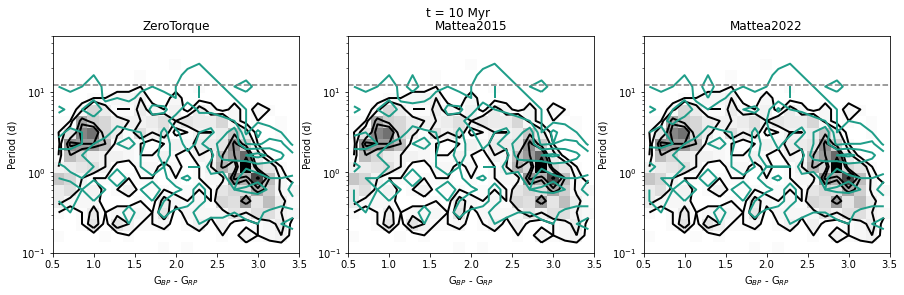

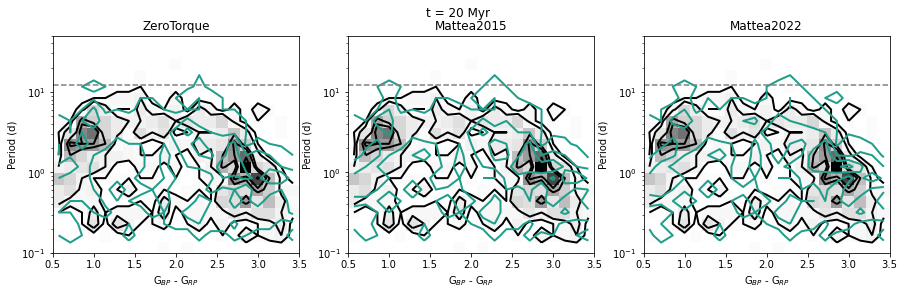

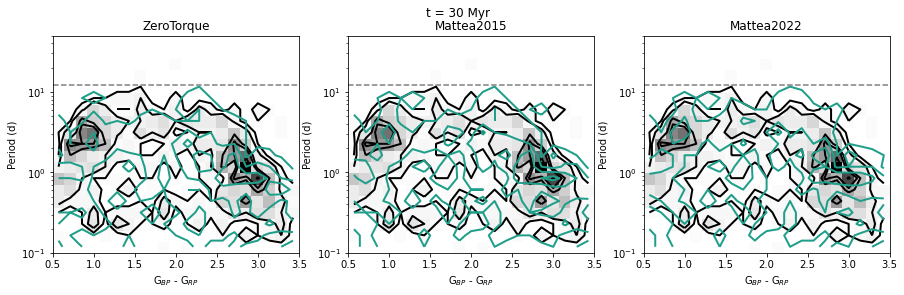

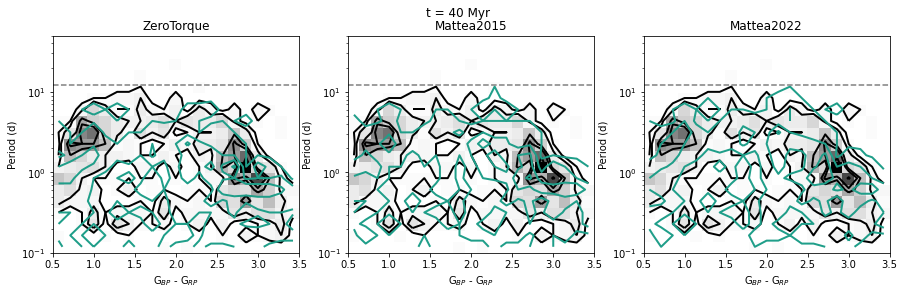

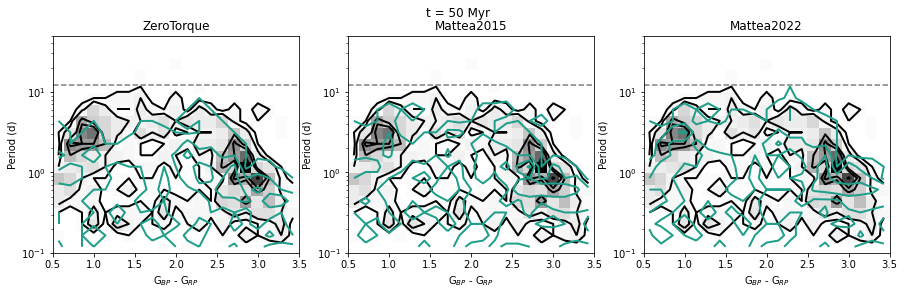

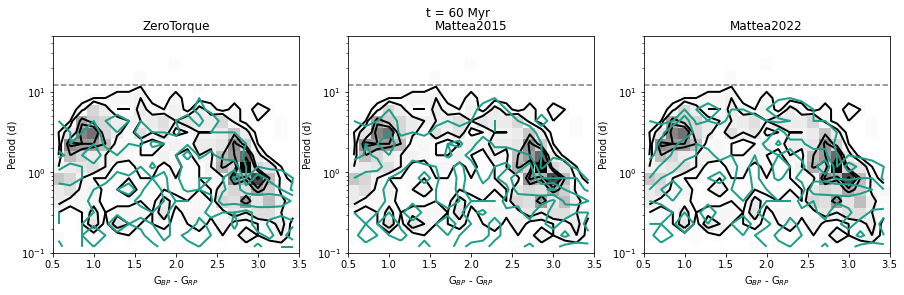

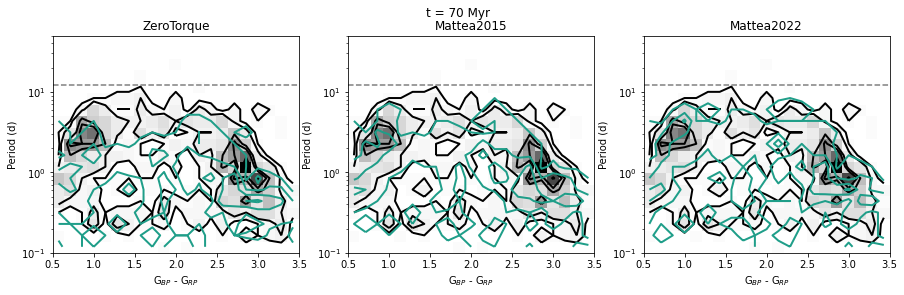

In [30]:
for age in [10,20,30,40,50,60,70]:
    plt.figure(figsize=(15,4))
    for i, model in enumerate(["ZeroTorque","Mattea2015","Mattea2022"]):
        ax = plt.subplot(1,3,i+1)
        modfile = os.path.join(mod_dir,f"UpSco_{model}/UpSco_{model}_000{age}Myr.txt")
#         print(modfile)
        mod = at.read(modfile,names=["mass","period"])
#         print(mod[:5])

        _ = plot_periodcolor_histogram(clean_limit=0,to_plot_indiv=False,ax=ax)
        mod_bprp = mass_to_bp_rp(mod["mass"])
#         ax.plot(mod_bprp,mod["period"],'*',ms=4,alpha=0.75)
        
        counts, xedges, yedges = np.histogram2d(mod_bprp,mod["period"],bins=[np.linspace(0.5,3.5,22),
                                          np.logspace(-1,np.log10(50),20)])
        xx = xedges[:-1] + (xedges[1:] - xedges[:-1])/2
        yy = yedges[:-1] + (yedges[1:] - yedges[:-1])/2
        cs = ax.contour(xx,yy,counts.transpose(),linewidths=2,levels=[1,5,10,15,20],
                        colors="#1f9e89",antialiased=True)

        ax.set_title(model)
        ax.set_ylim(0.1,50)
        ax.set_xlim(0.5,3.5)
        ax.set_yscale("log")

        ax.set_xlabel(r"G$_{BP}$ - G$_{RP}$")
        ax.set_ylabel("Period (d)")

        
        plt.suptitle(f"t = {age} Myr")
    plt.savefig(f"plots/matt_models_contour_{age:03d}Myr.png")


In [20]:
import matplotlib.cm as cm
import matplotlib as matplotlib

In [21]:
for i in np.linspace(0,1,10):
    print(matplotlib.colors.rgb2hex(cm.viridis(i)[:3]))

#440154
#482878
#3e4989
#31688e
#26828e
#1f9e89
#35b779
#6ece58
#b5de2b
#fde725
